In [1]:
import pandas as pd

df = pd.read_csv("Delinquency_prediction_dataset (1).csv")

In [2]:
# Display basic information
print("Dataset Overview:")
print(df.info())  # Check data types and missing values
print("\nSample Data:")
print(df.head())  # View first few rows

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month

In [3]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())  # Identify numerical distributions


Summary Statistics:
              Age         Income  Credit_Score  Credit_Utilization  \
count  500.000000     461.000000    498.000000          500.000000   
mean    46.266000  108379.893709    577.716867            0.491446   
std     16.187629   53662.723741    168.881211            0.197103   
min     18.000000   15404.000000    301.000000            0.050000   
25%     33.000000   62295.000000    418.250000            0.356486   
50%     46.500000  107658.000000    586.000000            0.485636   
75%     59.250000  155734.000000    727.250000            0.634440   
max     74.000000  199943.000000    847.000000            1.025843   

       Missed_Payments  Delinquent_Account  Loan_Balance  \
count       500.000000          500.000000    471.000000   
mean          2.968000            0.160000  48654.428875   
std           1.946935            0.366973  29395.537273   
min           0.000000            0.000000    612.000000   
25%           1.000000            0.000000  2371

In [4]:
# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())  # Count missing values per column


Missing Values:
Customer_ID              0
Age                      0
Income                  39
Credit_Score             2
Credit_Utilization       0
Missed_Payments          0
Delinquent_Account       0
Loan_Balance            29
Debt_to_Income_Ratio     0
Employment_Status        0
Account_Tenure           0
Credit_Card_Type         0
Location                 0
Month_1                  0
Month_2                  0
Month_3                  0
Month_4                  0
Month_5                  0
Month_6                  0
dtype: int64


In [5]:
# Check unique values in categorical columns
categorical_cols = ["Employment_Status", "Credit_Card_Type", "Location", "Month_1", "Month_2", "Month_3", "Month_4", "Month_5", "Month_6"]
for col in categorical_cols:
    print(f"\nUnique values in {col}: {df[col].unique()}")


Unique values in Employment_Status: ['EMP' 'Self-employed' 'Unemployed' 'employed' 'Employed' 'retired']

Unique values in Credit_Card_Type: ['Student' 'Standard' 'Platinum' 'Gold' 'Business']

Unique values in Location: ['Los Angeles' 'Phoenix' 'Chicago' 'New York' 'Houston']

Unique values in Month_1: ['Late' 'Missed' 'On-time']

Unique values in Month_2: ['Late' 'Missed' 'On-time']

Unique values in Month_3: ['Missed' 'Late' 'On-time']

Unique values in Month_4: ['Late' 'Missed' 'On-time']

Unique values in Month_5: ['Missed' 'On-time' 'Late']

Unique values in Month_6: ['Late' 'On-time' 'Missed']


In [7]:
# Detect anomalies
print("\nPossible Outliers:")
print(df[df["Credit_Utilization"] > 1])  # Credit Utilization should be between 0-1
print(df[df["Debt_to_Income_Ratio"] > 1]) 


Possible Outliers:
    Customer_ID  Age    Income  Credit_Score  Credit_Utilization  \
89     CUST0090   65  127856.0         361.0            1.025843   
265    CUST0266   72   16062.0         584.0            1.025017   
292    CUST0293   49   38061.0         316.0            1.002482   
426    CUST0427   49  163216.0         768.0            1.008734   

     Missed_Payments  Delinquent_Account  Loan_Balance  Debt_to_Income_Ratio  \
89                 2                   0        2200.0              0.346267   
265                1                   0       92285.0              0.240017   
292                1                   0       95267.0              0.448824   
426                6                   0       60530.0              0.452937   

    Employment_Status  Account_Tenure Credit_Card_Type  Location  Month_1  \
89                EMP              14         Standard   Chicago  On-time   
265        Unemployed              17             Gold   Phoenix   Missed   
292    

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [10]:
df = df.copy()  # Ensures changes apply to original dataframe

df["Income"] = df["Income"].fillna(df["Income"].median())
df["Loan_Balance"] = df["Loan_Balance"].fillna(df["Loan_Balance"].mean())


In [11]:
# Predict missing Credit_Score using Regression
predictors = ["Income", "Missed_Payments", "Debt_to_Income_Ratio"]
train_data = df[df["Credit_Score"].notnull()]
test_data = df[df["Credit_Score"].isnull()]

In [12]:
model = LinearRegression()
model.fit(train_data[predictors], train_data["Credit_Score"])
df.loc[df["Credit_Score"].isnull(), "Credit_Score"] = model.predict(test_data[predictors])

In [13]:
# Verify missing values are handled
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
Customer_ID             0
Age                     0
Income                  0
Credit_Score            0
Credit_Utilization      0
Missed_Payments         0
Delinquent_Account      0
Loan_Balance            0
Debt_to_Income_Ratio    0
Employment_Status       0
Account_Tenure          0
Credit_Card_Type        0
Location                0
Month_1                 0
Month_2                 0
Month_3                 0
Month_4                 0
Month_5                 0
Month_6                 0
dtype: int64


In [14]:
from scipy.stats import iqr

# Cap Credit Utilization at 1.0
df["Credit_Utilization"] = df["Credit_Utilization"].apply(lambda x: min(x, 1.0))

# Winsorize Debt-to-Income Ratio (cap extreme high values)
max_threshold = 0.552  # Based on max from summary stats
df["Debt_to_Income_Ratio"] = df["Debt_to_Income_Ratio"].apply(lambda x: min(x, max_threshold))

# Remove Outliers using IQR Method for Income and Loan_Balance
def remove_outliers(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr_value = iqr(df[col])
    lower_bound = q1 - 1.5 * iqr_value
    upper_bound = q3 + 1.5 * iqr_value
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df = remove_outliers("Income")
df = remove_outliers("Loan_Balance")

# Verify cleaned dataset
print("Dataset after handling outliers:")
print(df.describe())


Dataset after handling outliers:
              Age         Income  Credit_Score  Credit_Utilization  \
count  500.000000     500.000000    500.000000          500.000000   
mean    46.266000  108323.586000    577.712217            0.491322   
std     16.187629   51523.389667    168.542545            0.196774   
min     18.000000   15404.000000    301.000000            0.050000   
25%     33.000000   67610.500000    418.750000            0.356486   
50%     46.500000  107658.000000    584.000000            0.485636   
75%     59.250000  152572.250000    725.750000            0.634440   
max     74.000000  199943.000000    847.000000            1.000000   

       Missed_Payments  Delinquent_Account  Loan_Balance  \
count       500.000000          500.000000    500.000000   
mean          2.968000            0.160000  48654.428875   
std           1.946935            0.366973  28528.573640   
min           0.000000            0.000000    612.000000   
25%           1.000000            0.

In [16]:
# Standardize Employment_Status
df["Employment_Status"] = df["Employment_Status"].replace({"EMP": "Employed", "Self-employed": "Self-Employed"})

# Convert Payment History Columns to Numeric
payment_map = {"On-time": 0, "Late": 1, "Missed": 2}
months = ["Month_1", "Month_2", "Month_3", "Month_4", "Month_5", "Month_6"]
df[months] = df[months].replace(payment_map).infer_objects(copy=False)

# Verify standardization
print("Unique values after standardization:")
print(df["Employment_Status"].unique())
print(df[months].head())


Unique values after standardization:
['Employed' 'Self-Employed' 'Unemployed' 'employed' 'retired']
   Month_1  Month_2  Month_3  Month_4  Month_5  Month_6
0        1        1        2        1        2        1
1        2        2        1        2        0        0
2        2        1        1        0        2        1
3        1        2        1        2        1        1
4        2        0        2        1        1        1


In [17]:
print(df["Employment_Status"].unique())  # Check consistency
print(df[months].head())  # Verify numerical conversion of months


['Employed' 'Self-Employed' 'Unemployed' 'employed' 'retired']
   Month_1  Month_2  Month_3  Month_4  Month_5  Month_6
0        1        1        2        1        2        1
1        2        2        1        2        0        0
2        2        1        1        0        2        1
3        1        2        1        2        1        1
4        2        0        2        1        1        1


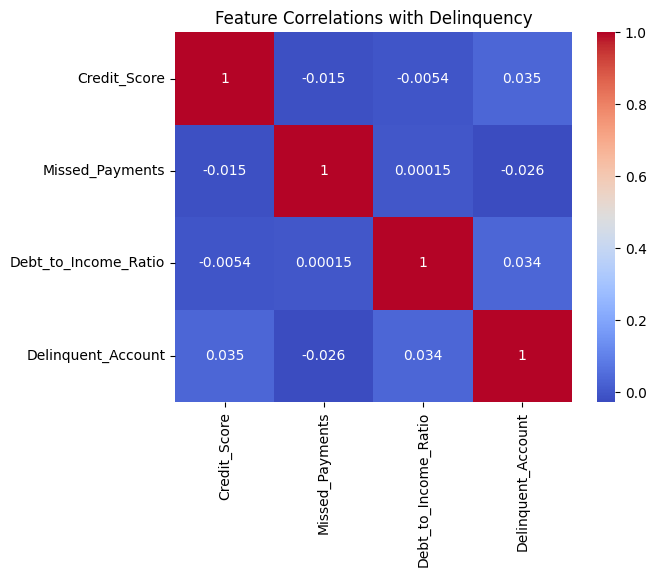

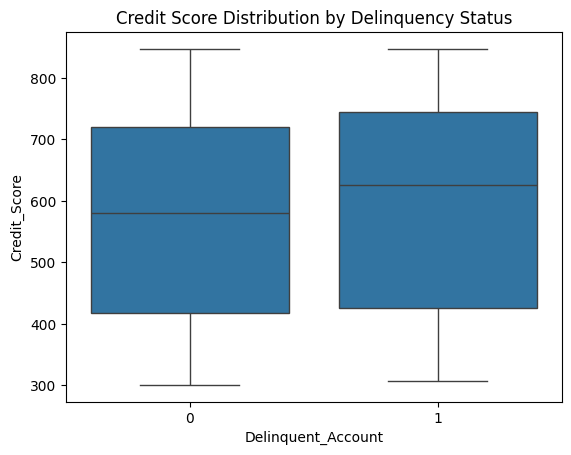

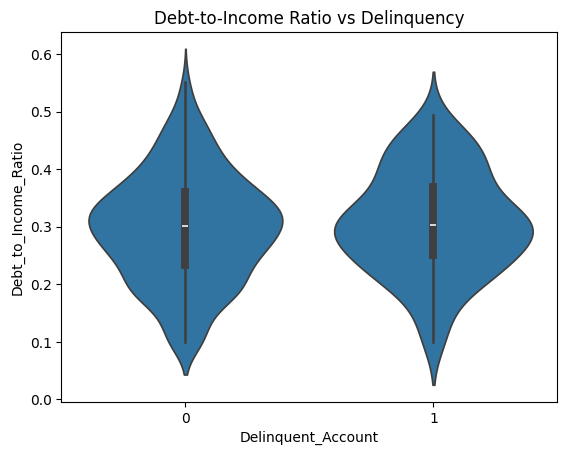

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Analysis
correlation_matrix = df[["Credit_Score", "Missed_Payments", "Debt_to_Income_Ratio", "Delinquent_Account"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlations with Delinquency")
plt.show()

# Boxplot of Credit Score vs Delinquency
sns.boxplot(x=df["Delinquent_Account"], y=df["Credit_Score"])
plt.title("Credit Score Distribution by Delinquency Status")
plt.show()

# Violin plot for Debt-to-Income Ratio vs Delinquency
sns.violinplot(x=df["Delinquent_Account"], y=df["Debt_to_Income_Ratio"])
plt.title("Debt-to-Income Ratio vs Delinquency")
plt.show()
